In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('src/silica_opt_insilico/')
from silica_opt_insilico import experiment, execute, data_processing, post_process, contour_animated
from saxs_data_processing import target_comparison
    
import numpy as np
import matplotlib.pyplot as plt

import pickle
import matplotlib.animation as animation
from IPython.display import HTML

## In silico optimization simulation

- objective functions work on volume fractions
- BO works on bounds/0-1


Ground truth:

- Diameter 80nm at [0.007, 0.018, 0.04]
- PDI min at [0.007, 0.025, 0.03]

## Parameters 

### SAXS Data processing parameters

### Experiment 'execution' parameters

In [2]:
# physical experiment bounds

teos_min_vf = 0.005
ammonia_min_vf = 0.005
water_min_vf = 0.005

teos_max_vf = 0.1
ammonia_max_vf = 0.1
water_max_vf = 0.15

noise_frac = 0.5 # what fraction of experimental noise to use

target_r_nm = 40 # particle size target

budget = 100

### Campaign structure 

### 2. Calculate scattering

In [3]:
# q range to consider up to and including spline fit step
q_min_subtract = 0.002
q_max_subtract = 0.035

# q range to interpolate spline fit on and perform distance metric calculation with
q_min_spl = 0.003
q_max_spl = 0.03
n_interpolate_gridpts = 1001 # number of grid points to interpolate q on.

In [4]:

target_r_angs = target_r_nm*10
target_pdi = 0.1
sld_silica = 8.575
sld_etoh = 9.611

In [5]:
q_grid = np.linspace(np.log10(q_min_spl), np.log10(q_max_spl), n_interpolate_gridpts)

q_grid_nonlog = 10**q_grid
target_I = target_comparison.target_intensities(q_grid_nonlog, target_r_angs, target_pdi, sld_silica, sld_etoh)
target_I = np.log10(target_I)

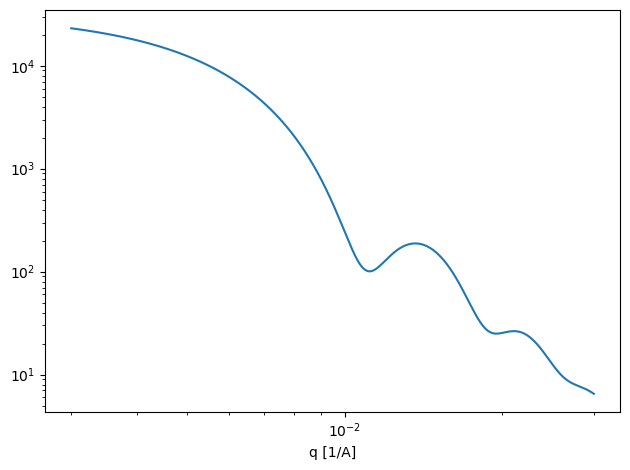

In [6]:
fig, ax = plt.subplots()
ax.loglog(10**q_grid, 10**target_I)
ax.set_xlabel('q [1/A]')

plt.tight_layout()


In [7]:
trials = {'default':{
        'batch_size':5,
        'amplitude_weight':0.1,
        'm_samples':5,
        'lower_bounds':[0.005, 0.005, 0.005], 
        'upper_bounds':[0.1, 0.1, 0.15], 
        'noise_level':0.5
        },
     'Batchsize_1':{
        'batch_size':1,
        'amplitude_weight':0.1,
        'm_samples':5,
        'lower_bounds':[0.005, 0.005, 0.005], 
        'upper_bounds':[0.1, 0.1, 0.15], 
        'noise_level':0.5
        },
     'Batchsize_10':{
        'batch_size':10,
        'amplitude_weight':0.1,
        'm_samples':5,
        'lower_bounds':[0.005, 0.005, 0.005], 
        'upper_bounds':[0.1, 0.1, 0.15], 
        'noise_level':0.5
        },
     'AmplitudeWeight_0':{
        'batch_size':5,
        'amplitude_weight':0,
        'm_samples':5,
        'lower_bounds':[0.005, 0.005, 0.005], 
        'upper_bounds':[0.1, 0.1, 0.15], 
        'noise_level':0.5
        },
     'AmplitudeWeight_0point5':{
        'batch_size':5,
        'amplitude_weight':0.5,
        'm_samples':5,
        'lower_bounds':[0.005, 0.005, 0.005], 
        'upper_bounds':[0.1, 0.1, 0.15], 
        'noise_level':0.5
        },
     'Bounds_restricted':{
        'batch_size':5,
        'amplitude_weight':0.1,
        'm_samples':5,
        'lower_bounds':[0.005, 0.005, 0.005], 
        'upper_bounds':[0.6, 0.6, 0.6], 
        'noise_level':0.5
        },
     'NoiseLevel_1':{
        'batch_size':5,
        'amplitude_weight':0.1,
        'm_samples':5,
        'lower_bounds':[0.005, 0.005, 0.005], 
        'upper_bounds':[0.1, 0.1, 0.15], 
        'noise_level':1
        },
    'SobolBaseline':{
        'batch_size':0,
        'amplitude_weight':0.1,
        'm_samples':7,
        'lower_bounds':[0.005, 0.005, 0.005], 
        'upper_bounds':[0.1, 0.1, 0.15], 
        'noise_level':0.5
        },
    }

In [8]:
trials_2 = {'as_run_now':{
        'batch_size':10,
        'amplitude_weight':0.5,
        'm_samples':5,
        'lower_bounds':[0.005, 0.005, 0.005], 
        'upper_bounds':[0.1, 0.1, 0.15], 
        'noise_level':1
        }
           }

In [49]:
for trial_name, params in trials_2.items():
    batch_size = params['batch_size']
    amplitude_weight = params['amplitude_weight']
    m_samples = params['m_samples']
    lower_bounds = params['lower_bounds']
    upper_bounds = params['upper_bounds']
    noise_level = params['noise_level']

    execute.run_grouped_trials(target_I, q_grid, batch_size, amplitude_weight, m_samples, lower_bounds, upper_bounds, trial_name, noise_level, budget, characterization = 'DLS')

Running optimization for trial as_run_now
### Replicate 0 ###
starting initial samples
starting batch 1
Optimized acqf in 6.583248853683472 s
starting batch 2
Optimized acqf in 5.966883420944214 s
starting batch 3
Optimized acqf in 1.0736453533172607 s
starting batch 4


/home/ubuntu/miniconda3/envs/botorch/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Optimized acqf in 1.1917786598205566 s
starting batch 5


/home/ubuntu/miniconda3/envs/botorch/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Optimized acqf in 5.819919109344482 s
starting batch 6


/home/ubuntu/miniconda3/envs/botorch/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Optimized acqf in 18.24893045425415 s
starting batch 7


/home/ubuntu/miniconda3/envs/botorch/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Optimized acqf in 3.3018128871917725 s
starting batch 8


/home/ubuntu/miniconda3/envs/botorch/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
/home/ubuntu/miniconda3/envs/botorch/lib/python3.12/site-packages/botorch/optim/optimize.py:568: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[NumericalWarning('A not p.d., added jitter of 1.0e-08 to the diagonal'), OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 2 and message ABNORMAL: .')]
Trying again with a new set of initial conditions.
  return _optimize_acqf_batch(opt_inputs=opt_inputs)


Optimized acqf in 3.6978671550750732 s
starting batch 9


/home/ubuntu/miniconda3/envs/botorch/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
/home/ubuntu/miniconda3/envs/botorch/lib/python3.12/site-packages/botorch/optim/optimize.py:568: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[NumericalWarning('A not p.d., added jitter of 1.0e-08 to the diagonal'), OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 2 and message ABNORMAL: .')]
Trying again with a new set of initial conditions.
  return _optimize_acqf_batch(opt_inputs=opt_inputs)


Optimized acqf in 3.2715373039245605 s
starting batch 10


/home/ubuntu/miniconda3/envs/botorch/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Optimized acqf in 37.47758460044861 s
### Replicate 1 ###
starting initial samples
starting batch 1
Optimized acqf in 9.35948657989502 s
starting batch 2
Optimized acqf in 46.54194521903992 s
starting batch 3
Optimized acqf in 11.230420351028442 s
starting batch 4
Optimized acqf in 0.9905426502227783 s
starting batch 5


/home/ubuntu/miniconda3/envs/botorch/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Optimized acqf in 0.45290136337280273 s
starting batch 6


/home/ubuntu/miniconda3/envs/botorch/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Optimized acqf in 31.185667276382446 s
starting batch 7


/home/ubuntu/miniconda3/envs/botorch/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Optimized acqf in 0.5610926151275635 s
starting batch 8


/home/ubuntu/miniconda3/envs/botorch/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Optimized acqf in 1.448392629623413 s
starting batch 9


/home/ubuntu/miniconda3/envs/botorch/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Optimized acqf in 0.501988410949707 s
starting batch 10


/home/ubuntu/miniconda3/envs/botorch/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Optimized acqf in 1.1642699241638184 s
### Replicate 2 ###
starting initial samples
starting batch 1
Optimized acqf in 3.1792845726013184 s
starting batch 2
Optimized acqf in 16.407120943069458 s
starting batch 3
Optimized acqf in 0.8084142208099365 s
starting batch 4
Optimized acqf in 12.12893295288086 s
starting batch 5
Optimized acqf in 17.691344499588013 s
starting batch 6
Optimized acqf in 0.46119189262390137 s
starting batch 7
Optimized acqf in 1.0849113464355469 s
starting batch 8


/home/ubuntu/miniconda3/envs/botorch/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Optimized acqf in 80.59066677093506 s
starting batch 9
Optimized acqf in 21.279133558273315 s
starting batch 10


/home/ubuntu/miniconda3/envs/botorch/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Optimized acqf in 83.22482085227966 s


## 8. Analyze 

#### 1. Convergence plot + metrics

### 1. Find true minima for this objective function (do once per objective)

In [50]:
true_min = [6.936e-03, 2.021e-02, 4.000e-02] # for original 80nm objective

In [52]:
data_complete, data_batches, best_distances_list, best_uuids_list, converge_iterations, best_composition_dist, name_bounds = post_process.process_distances('as_run_now', trials_2['as_run_now'], true_min)

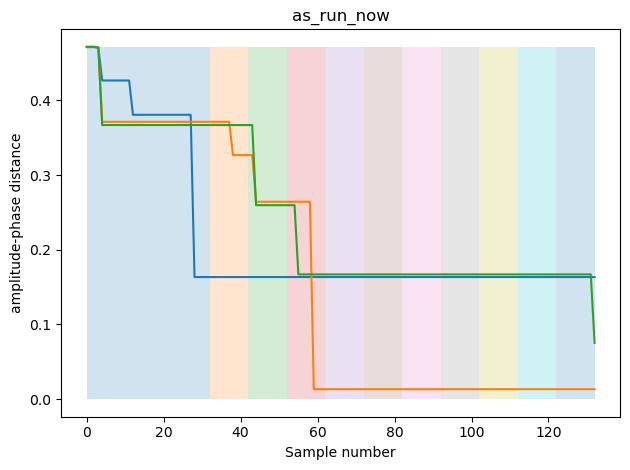

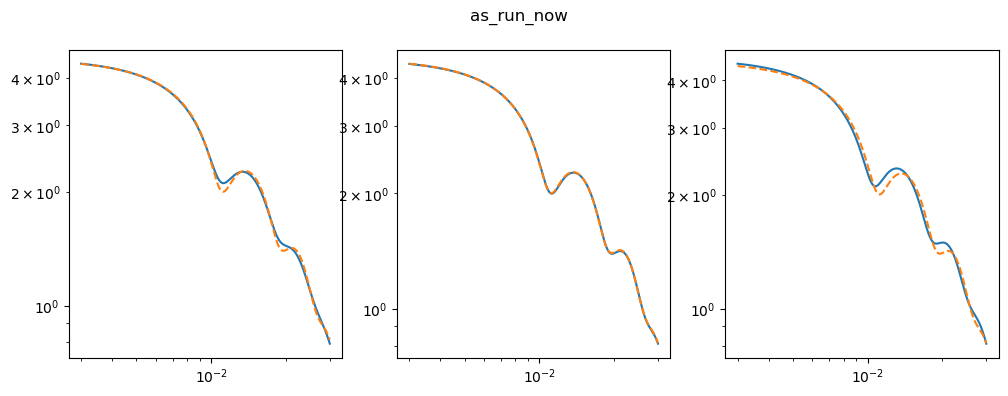

In [53]:
fig = post_process.convergence_plot(data_complete, best_distances_list, best_uuids_list, name_bounds, 'as_run_now')
best_scat = post_process.best_scatterer_plots(data_complete, best_uuids_list, q_grid_nonlog, target_I, 'as_run_now')

In [54]:
converge_iterations

['Not converged', 58, 'Not converged']

In [55]:
best_composition_dist

[0.06779071571176494, 0.03597757, 0.03743444]

In [56]:
lower_bounds = [teos_min_vf, ammonia_min_vf, water_min_vf]
upper_bounds = [teos_max_vf, ammonia_max_vf, water_max_vf]

<function plot_phasemap.<locals>.<lambda> at 0x76ed275b0360>
<function plot_phasemap.<locals>.<lambda> at 0x76ec5352a020>


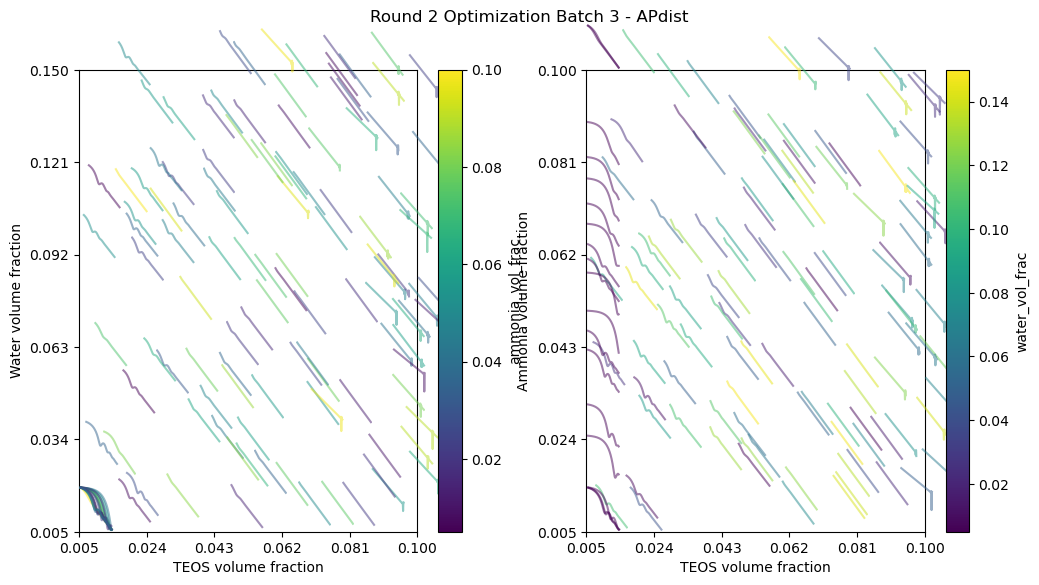

In [57]:
phased = post_process.phase_diagram(data_batches[-1], lower_bounds, upper_bounds, q_grid)

## Contour trajectory plot

In [58]:
n_grid = 50
m_samples = 5
n_batches = 10
batch_size = 10

In [59]:
with open('TEOS_water_ammoniaOptima_gridvals_80nm_ogfuncs_50.npy', 'rb') as f:
    Z_ammonia = np.load(f)

with open('TEOS_ammonia_waterOptima_gridvals_80nm_ogfuncs_50.npy', 'rb') as f:
    Z_water = np.load(f)

In [60]:
ammonia = np.linspace(ammonia_min_vf, ammonia_max_vf, n_grid)
water = np.linspace(water_min_vf, water_max_vf, n_grid)
teos = np.linspace(teos_min_vf, teos_max_vf, n_grid)

Animation saved as as_run_DLS.html


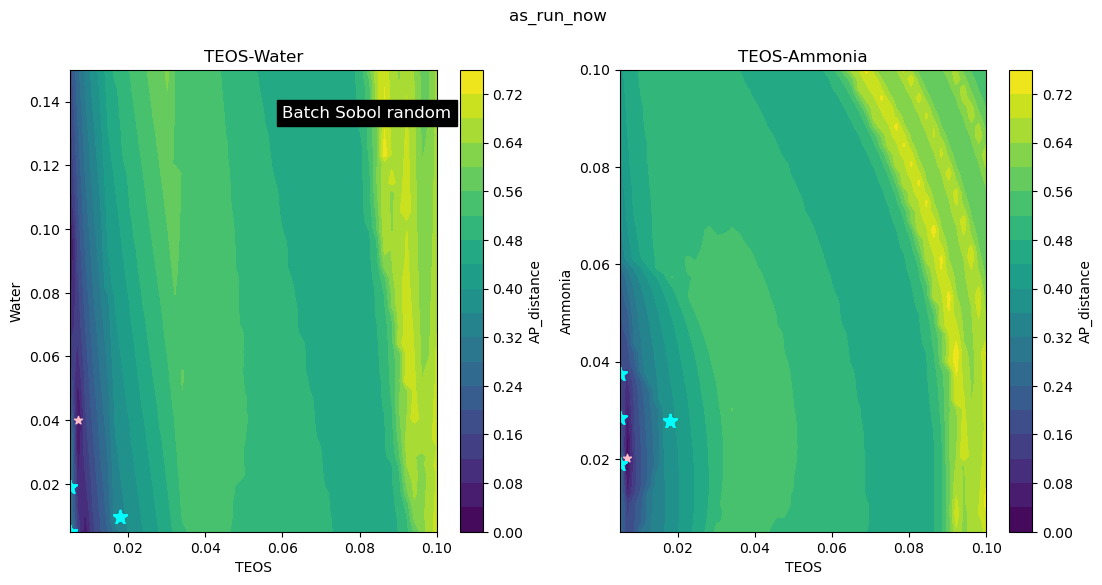

In [61]:
anim = contour_animated.ContourAnimation(ammonia, water, teos, Z_ammonia, Z_water, 
                        data_batches[-2], best_uuids_list[-2], n_batches, true_min, 'as_run_now', n_grid, m_samples, batch_size)

anim.save("as_run_DLS.html", format="html")  # Saves as an HTML file